In [2]:
import pandas as pd
import numpy as np
from sportsipy.ncaab.teams import Teams
from sportsipy.ncaab.schedule import Schedule
from sportsipy.ncaab.boxscore import Boxscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [3]:
teams = Teams()
team1 = teams('southern-california')
team2 = teams('pittsburgh')
#print(teams)
dataset_total_team1 = pd.DataFrame()
dataset_total_team2 = pd.DataFrame()
for team in team1.schedule:
    dataset_total_team1 = pd.concat([dataset_total_team1, team.dataframe])
for team in team2.schedule:
    dataset_total_team2 = pd.concat([dataset_total_team2, team.dataframe])    

In [4]:
team1.

Southern California (SOUTHERN-CALIFORNIA) - 2021


In [108]:
#Team 1 index the boxscores
team1_schedule = Schedule('Gonzaga', year = '2020')
index = team1_schedule.dataframe
alist = list(index['boxscore_index'])
Boxscore(alist[0]).dataframe

,away_assist_percentage,away_assists,away_block_percentage,away_blocks,away_defensive_rating,away_defensive_rebound_percentage,away_defensive_rebounds,away_effective_field_goal_percentage,away_field_goal_attempts,away_field_goal_percentage,...,home_two_point_field_goals,home_win_percentage,home_wins,location,losing_abbr,losing_name,pace,winner,winning_abbr,winning_name
2019-11-05-20-gonzaga,58.3,14,2.6,1,133.8,62.5,15,0.582,49,0.49,...,24,1.0,1,"McCarthey Athletic Center, Spokane, Washington",ALABAMA-STATE,Alabama State,70.8,Home,GONZAGA,Gonzaga


In [3]:
FIELDS_TO_DROP = ['date','arena','datetime','game','opponent_abbr','type',
                  'boxscore_index','opponent_name','opponent_name','time','result','streak']
data_post_drop1 = dataset_total_team1.drop(columns=FIELDS_TO_DROP)
data_post_drop2 = dataset_total_team2.drop(columns=FIELDS_TO_DROP)
dataframe_temp = np.zeros([len(data_post_drop1.index)])
dataframe_temp2 = np.zeros([len(data_post_drop2.index)])

for ind in range(len(data_post_drop1.index)):
    if data_post_drop1['location'][ind] == 'Home':
        dataframe_temp[ind] = 1
    elif data_post_drop1['location'][ind] == 'Away':
        dataframe_temp[ind] = -1
    elif data_post_drop1['location'][ind] == 'Neutral':
        dataframe_temp[ind] = 0
        
for ind in range(data_post_drop2.shape[0]):
    if data_post_drop2['location'][ind] == 'Home':
        dataframe_temp2[ind] = int(1)
    elif data_post_drop2['location'][ind] == 'Away':
        dataframe_temp2[ind] = int(-1)
    elif data_post_drop2['location'][ind] == 'Neutral':
        dataframe_temp2[ind] = int(0)
        
index = data_post_drop1. index
a_list = list(index)
index2 = data_post_drop2. index
a_list2 = list(index2)
data_post_drop1['locationNumerical']=pd.Series(data=dataframe_temp,index=
                                               a_list)

data_post_drop2['locationNumerical']=pd.Series(dataframe_temp2,index=
                                               a_list2)
for ind in range(len(data_post_drop1.index)):
    if data_post_drop1['opponent_conference'][ind] == 'SEC' or data_post_drop1['opponent_conference'][ind] == 'ACC' or  data_post_drop1['opponent_conference'][ind] == 'Big Twelve' or data_post_drop1['opponent_conference'][ind] == 'Big Ten' or data_post_drop1['opponent_conference'][ind] == 'Pac-12' or data_post_drop1['opponent_conference'][ind] == 'Big East':
        dataframe_temp[ind] = 1
    else:
        dataframe_temp[ind] = 0
for ind in range(len(data_post_drop2.index)):
    if data_post_drop2['opponent_conference'][ind] == 'SEC' or data_post_drop2['opponent_conference'][ind] == 'ACC' or  data_post_drop2['opponent_conference'][ind] == 'Big Twelve' or data_post_drop2['opponent_conference'][ind] == 'Big Ten' or data_post_drop2['opponent_conference'][ind] == 'Pac-12' or data_post_drop2['opponent_conference'][ind] == 'Big East':
        dataframe_temp2[ind] = 1
    else:
        dataframe_temp2[ind] = 0
        
data_post_drop1['conferenceNumerical']=pd.Series(data=dataframe_temp,index=
                                               a_list)
data_post_drop2['conferenceNumerical']=pd.Series(dataframe_temp2,index=
                                               a_list2)

for ind in range(len(data_post_drop1.index)):
    if data_post_drop1['opponent_rank'][ind] is None:
        dataframe_temp[ind] = 0
    else:
        dataframe_temp[ind] = 1
        
for ind in range(len(data_post_drop2.index)):
    if data_post_drop2['opponent_rank'][ind] is None:
        dataframe_temp2[ind] = 0
    else:
        dataframe_temp2[ind] = 1
        
data_post_drop1['opponent_rank_numerical']=pd.Series(data=dataframe_temp,index=
                                               a_list)
data_post_drop2['opponent_rank_numerical']=pd.Series(dataframe_temp2,index=
                                               a_list2)        
team1_class_season = np.zeros(len(data_post_drop1.index))
team2_class_season = np.ones(len(data_post_drop2.index))
data_post_drop1['Class']=pd.Series(data=team1_class_season,index=
                                               a_list)
data_post_drop2['Class']=pd.Series(data=team2_class_season,index=
                                               a_list2)

datafinal_1 = data_post_drop1.drop(columns=['opponent_conference','location','opponent_rank'])
datafinal_2 = data_post_drop2.drop(columns=['opponent_conference','location','opponent_rank'])

In [4]:
team1_wins = team1.wins                                     
team2_wins = team2.wins                                     
#PPG                                                        
team1_PPG = team1.points/team1.games_played                 
team2_PPG = team2.points/team2.games_played                 
#PPG - Opposing                                             
team1_OPP_PPG = team1.opp_points/team1.games_played         
team2_OPP_PPG = team2.opp_points/team2.games_played         
#Threes a game                                              
team1_3 = team1.three_point_field_goals/team1.games_played                 
team2_3 = team2.three_point_field_goals/team2.games_played                 
#Threes a game                                                          
team1_turn = team1.turnovers/team1.games_played               
team2_turn = team2.turnovers/team2.games_played 
#Offensive Rating
team1_off_rating = team1.offensive_rating
team2_off_rating = team2.offensive_rating

In [5]:
if team1.conference == 'sec' or team1.conference == 'acc' or  team1.conference == 'big-12' or team1.conference == 'big-10' or team1.conference == 'pac-12' or team1.conference == 'big-east':
    team1_conf = 1                                                              
else:
    team1_conf = 0

if team2.conference == 'sec' or team2.conference == 'acc' or team2.conference == 'big-12' or team2.conference == 'big-10' or team2.conference == 'pac-12' or team2.conference == 'big-east':
    team2_conf = 1
else:
    team2_conf = 0

In [6]:
#simple rating system
team1.
team1_rs = team1.simple_rating_system                                           
team2_rs = team2.simple_rating_system                                           
#Strength of schedule                                                           
team1_Str_Sched = team1.strength_of_schedule                                    
team2_Str_Sched = team2.strength_of_schedule


In [7]:
team1_class = np.zeros(1)
team2_class = np.ones(1)
team1_DF = {'Off rating':team1_off_rating, 'Wins': team1_wins,'PPG':team1_PPG,'PPG_OPP':team1_OPP_PPG,
            '3AGAME':team1_3,'Turn':team1_turn,'CONF':team1_conf,
            'Rating':team1_rs,'Team Sched':team1_Str_Sched, 'Class': team1_class}
team2_DF = {'Off rating':team2_off_rating,'Wins': team2_wins,'PPG':team2_PPG,'PPG_OPP':team2_OPP_PPG,
            '3AGAME':team2_3,'Turn':team2_turn,'CONF':team2_conf,
            'Rating':team2_rs,'Team Sched':team2_Str_Sched,'Class': team2_class}

df_Team1 = pd.DataFrame(data=team1_DF)
df_Team2 = pd.DataFrame(data=team2_DF)

In [8]:
df_final = df_Team1.append([df_Team2])
df_final_season = datafinal_1.append([datafinal_2])
df_final_season

,overtimes,points_against,points_for,season_losses,season_wins,locationNumerical,conferenceNumerical,opponent_rank_numerical,Class
2020-11-25-21-southern-california,1,87,95,0,1,1.0,0.0,0.0,0.0
2020-11-28-21-southern-california,0,62,76,0,2,1.0,0.0,0.0,0.0
2020-12-01-14-brigham-young,0,53,79,0,3,0.0,0.0,0.0,0.0
2020-12-03-19-southern-california,0,61,58,1,3,0.0,1.0,0.0,0.0
2020-12-08-22-southern-california,0,56,91,1,4,1.0,0.0,0.0,0.0
2020-12-29-19-southern-california,0,63,86,1,5,1.0,0.0,0.0,0.0
2020-12-31-22-southern-california,0,72,62,2,5,1.0,1.0,0.0,0.0
2021-01-02-16-southern-california,0,46,64,2,6,1.0,1.0,0.0,0.0
2021-01-07-21-arizona,0,73,87,2,7,-1.0,1.0,0.0,0.0
2021-01-09-19-arizona-state,0,64,73,2,8,-1.0,1.0,0.0,0.0


In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler


#Aggregate training data
X = df_final[['Off rating','Wins','PPG','PPG_OPP','3AGAME',
              'Turn','CONF','Rating','Team Sched']]
y = df_final['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y)
#Seasonal training data
X1 = df_final_season[['overtimes','points_against',
                 'points_for','season_losses',
                 'season_wins','locationNumerical',
                 'conferenceNumerical',
                 'opponent_rank_numerical']]
y1 = df_final_season['Class']
X_train_season, X_test_season, y_train_season, y_test_season = train_test_split(X1, y1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6}
params_boost = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
model = RandomForestRegressor(**parameters)
model_boost = GradientBoostingRegressor(**params_boost)

model_season = RandomForestRegressor(**parameters)
model_boost_season = GradientBoostingRegressor(**params_boost)

model.fit(X_train, y_train)
model_boost.fit(X_train, y_train)

model_season.fit(X_train_season, y_train_season)
model_boost_season.fit(X_train_season, y_train_season)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5)

In [48]:
if y_test.astype(int).array == 0:
    team_test = team1.abbreviation
else:
    team_test = team2.abbreviation 

array([1.])

In [47]:
if model.predict(X_test) == 0:
    print(team_test + " loses")
else:
    print(team_test + " wins")       

SOUTHERN-CALIFORNIA wins


Text(0.5, 1.0, 'Seasonal NCAAM-RandomForestRegressor')

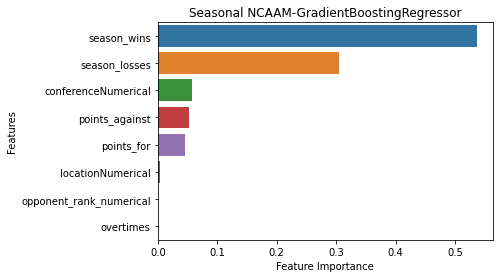

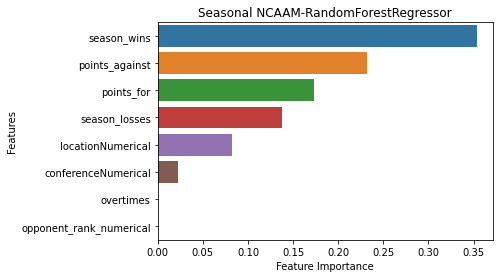

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_imp = pd.Series(model_boost_season.feature_importances_,index=X1.columns).sort_values(ascending=False)
plot1 = plt.figure(1)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Seasonal NCAAM-GradientBoostingRegressor')
plot1 = plt.figure(2)
feature_imp = pd.Series(model_season.feature_importances_,index=X1.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Seasonal NCAAM-RandomForestRegressor')